In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_pickle('output/analysis_Apr_26_2022_03-32-37_top100list.pkl')
data.head()

<AxesSubplot:xlabel='levenshtein_similarity', ylabel='Count'>

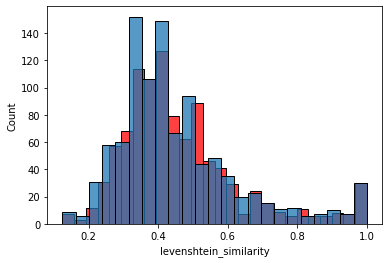

In [129]:
sns.histplot(data['levenshtein_similarity'], color='red')
sns.histplot(data['difflib_similarity'])

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Levenshtein Distance Ratio')

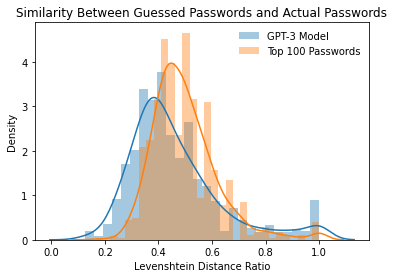

In [166]:
sns.distplot(data['levenshtein_similarity'], label='GPT-3 Model')
sns.distplot(data['top100_levenshtein_similarity'], label='Top 100 Passwords')
plt.title('Similarity Between Guessed Passwords and Actual Passwords')
plt.legend(frameon=False)
plt.xlabel('Levenshtein Distance Ratio')

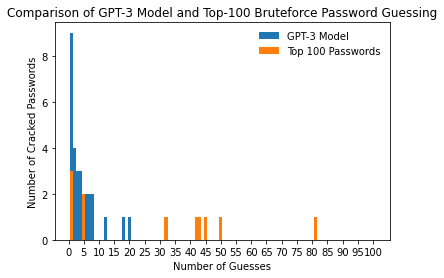

In [167]:
# num cracked passwords vs num guesses
modelY = []
top100Y = []

n = 100
for i in range(1,n+1):
  modelY.append(len(data[data['guesses_model10k'] == i]))
  top100Y.append(len(data[data['guesses_top100'] == i]))

plt.title("Comparison of GPT-3 Model and Top-100 Bruteforce Password Guessing")
plt.xlabel("Number of Guesses")
plt.ylabel("Number of Cracked Passwords")
width = 1
plt.xticks(np.arange(0,n+1,5))
# plt.yticks(np.arange(0,50,2))
plt.bar(np.arange(1,n+1,1), modelY, width=width, label="GPT-3 Model")
plt.bar(np.arange(1,n+1,1), top100Y, width=width, label="Top 100 Passwords")
plt.legend(frameon=False)
plt.show()